In [ ]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Preprocessing
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Models ML
from sklearn.svm import SVC
#Metrics
from sklearn.metrics import confusion_matrix,accuracy_score
# from sklearn.metrics import mean_squared_error,r2_score
# from sklearn.metrics import roc_curve, auc

In [ ]:
data = pd.read_csv('corona_tested_006.csv')
data

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,True,False,True,False,False,negative,NaN,NaN,Abroad
1,2,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
2,3,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
3,4,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Abroad
4,5,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
57797,57798,30-03-2020,True,True,False,False,False,positive,Yes,male,Abroad
57798,57799,30-03-2020,False,False,False,False,False,negative,Yes,female,Other
57799,57800,30-03-2020,False,False,False,False,False,other,No,female,Contact with confirmed
57800,57801,30-03-2020,False,False,False,False,False,negative,No,female,Other


In [ ]:
row,col = data.shape
print("No of row = ",row)
print("No of col = ",col)


No of row =  57802
No of col =  11


In [ ]:
# There is not NaN or null values in columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57802 entries, 0 to 57801
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Ind_ID               57802 non-null  int64 
 1   Test_date            57802 non-null  object
 2   Cough_symptoms       57776 non-null  object
 3   Fever                57776 non-null  object
 4   Sore_throat          57801 non-null  object
 5   Shortness_of_breath  57801 non-null  object
 6   Headache             57801 non-null  object
 7   Corona               57802 non-null  object
 8   Age_60_above         53290 non-null  object
 9   Sex                  42984 non-null  object
 10  Known_contact        57802 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.9+ MB


In [ ]:
data = data.dropna()


In [ ]:
data.shape

(42968, 11)

In [ ]:
data['Cough_symptoms'] = data['Cough_symptoms'].astype('bool').astype('int')
data['Fever'] = data['Fever'].astype('bool').astype('int')
data['Sore_throat'] = data['Sore_throat'].astype('bool').astype('int')
data['Shortness_of_breath'] = data['Shortness_of_breath'].astype('bool').astype('int')
data['Headache'] = data['Headache'].astype('bool').astype('int')
# data['Age_60_above'] = data['Age_60_above'].astype('bool')
# data['Sex'] = data['Sex'].astype('bool')
# data['Known_contact'] = data['Known_contact'].astype('bool')

<ipython-input-7-ce0afd1578a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cough_symptoms'] = data['Cough_symptoms'].astype('bool').astype('int')
<ipython-input-7-ce0afd1578a7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Fever'] = data['Fever'].astype('bool').astype('int')
<ipython-input-7-ce0afd1578a7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [ ]:
# data.describe()
data

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
13727,13728,22-03-2020,1,0,0,0,0,negative,No,male,Abroad
13728,13729,22-03-2020,1,0,0,0,0,negative,No,female,Abroad
13730,13731,22-03-2020,1,1,0,0,0,positive,Yes,female,Other
13731,13732,22-03-2020,0,0,0,0,0,other,No,female,Other
13732,13733,22-03-2020,0,0,0,0,0,other,No,female,Other
...,...,...,...,...,...,...,...,...,...,...,...
57797,57798,30-03-2020,1,1,0,0,0,positive,Yes,male,Abroad
57798,57799,30-03-2020,0,0,0,0,0,negative,Yes,female,Other
57799,57800,30-03-2020,0,0,0,0,0,other,No,female,Contact with confirmed
57800,57801,30-03-2020,0,0,0,0,0,negative,No,female,Other


In [ ]:
# len(data['Corona'] == 'other')

In [ ]:
print(len(data[data['Corona'] == 'other']))
print(len(data[data['Corona'] == 'negative']))
print(len(data[data['Corona'] == 'positive']))

738
38409
3821


In [ ]:
data = data[data['Corona'] != 'other']
data

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
13727,13728,22-03-2020,1,0,0,0,0,negative,No,male,Abroad
13728,13729,22-03-2020,1,0,0,0,0,negative,No,female,Abroad
13730,13731,22-03-2020,1,1,0,0,0,positive,Yes,female,Other
13734,13735,22-03-2020,0,0,0,0,0,negative,No,male,Other
13735,13736,22-03-2020,0,0,0,0,0,negative,No,female,Other
...,...,...,...,...,...,...,...,...,...,...,...
57796,57797,30-03-2020,0,1,0,0,0,positive,No,female,Contact with confirmed
57797,57798,30-03-2020,1,1,0,0,0,positive,Yes,male,Abroad
57798,57799,30-03-2020,0,0,0,0,0,negative,Yes,female,Other
57800,57801,30-03-2020,0,0,0,0,0,negative,No,female,Other


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42230 entries, 13727 to 57801
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Ind_ID               42230 non-null  int64 
 1   Test_date            42230 non-null  object
 2   Cough_symptoms       42230 non-null  int64 
 3   Fever                42230 non-null  int64 
 4   Sore_throat          42230 non-null  int64 
 5   Shortness_of_breath  42230 non-null  int64 
 6   Headache             42230 non-null  int64 
 7   Corona               42230 non-null  object
 8   Age_60_above         42230 non-null  object
 9   Sex                  42230 non-null  object
 10  Known_contact        42230 non-null  object
dtypes: int64(6), object(5)
memory usage: 4.9+ MB


In [ ]:
data = data.iloc[:,2:]

In [ ]:
data

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
13727,1,0,0,0,0,negative,No,male,Abroad
13728,1,0,0,0,0,negative,No,female,Abroad
13730,1,1,0,0,0,positive,Yes,female,Other
13734,0,0,0,0,0,negative,No,male,Other
13735,0,0,0,0,0,negative,No,female,Other
...,...,...,...,...,...,...,...,...,...
57796,0,1,0,0,0,positive,No,female,Contact with confirmed
57797,1,1,0,0,0,positive,Yes,male,Abroad
57798,0,0,0,0,0,negative,Yes,female,Other
57800,0,0,0,0,0,negative,No,female,Other


In [ ]:
data['Known_contact'].value_counts()


Known_contact
Other                     35040
Abroad                     4716
Contact with confirmed     2473
Othe                          1
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
data["Age_60_above"] = ord_enc.fit_transform(data[["Age_60_above"]]).astype('int')
data["Sex"] = ord_enc.fit_transform(data[["Sex"]]).astype('int')
data["Known_contact"] = ord_enc.fit_transform(data[["Known_contact"]]).astype('int')
data["Corona"] = ord_enc.fit_transform(data[["Corona"]]).astype('int')

In [ ]:
data

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
13727,1,0,0,0,0,0,0,1,0
13728,1,0,0,0,0,0,0,0,0
13730,1,1,0,0,0,1,1,0,3
13734,0,0,0,0,0,0,0,1,3
13735,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...
57796,0,1,0,0,0,1,0,0,1
57797,1,1,0,0,0,1,1,1,0
57798,0,0,0,0,0,0,1,0,3
57800,0,0,0,0,0,0,0,0,3


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42230 entries, 13727 to 57801
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Cough_symptoms       42230 non-null  int64
 1   Fever                42230 non-null  int64
 2   Sore_throat          42230 non-null  int64
 3   Shortness_of_breath  42230 non-null  int64
 4   Headache             42230 non-null  int64
 5   Corona               42230 non-null  int64
 6   Age_60_above         42230 non-null  int64
 7   Sex                  42230 non-null  int64
 8   Known_contact        42230 non-null  int64
dtypes: int64(9)
memory usage: 4.2 MB


In [ ]:
data.shape

(42230, 9)

In [ ]:
df1 = data[data['Corona'] == 1]
df2 = data[data['Corona'] == 0].iloc[0:10626]
print(len(df1))
data = pd.concat([df1,df2])
print(len(df2))

3821
10626


In [ ]:
data.shape

(14447, 9)

In [ ]:
data

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
13730,1,1,0,0,0,1,1,0,3
13748,1,1,0,0,0,1,1,1,0
13752,1,1,0,0,0,1,1,1,1
13765,1,1,0,0,0,1,0,1,1
13768,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
25815,0,0,0,0,0,0,0,1,3
25816,0,0,0,0,0,0,0,1,3
25817,0,0,0,0,0,0,0,1,3
25818,0,0,0,0,0,0,0,0,3


In [ ]:
data = data.sample(frac = 1)
data

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
23250,0,0,0,0,0,0,1,1,3
17562,0,0,0,0,0,0,0,1,3
57129,1,0,0,0,0,1,0,1,1
18163,1,1,0,0,0,0,0,1,3
17239,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
19007,0,0,0,0,0,0,0,1,0
54923,0,1,1,0,0,1,0,1,3
25410,0,0,0,0,0,0,0,1,3
16988,1,0,0,0,0,0,1,0,3


In [ ]:
# data.describe()

In [ ]:
data['Known_contact'].value_counts()

Known_contact
3    10120
0     2404
1     1923
Name: count, dtype: int64

In [ ]:
data.corr()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
Cough_symptoms,1.000000,0.454039,0.179999,0.174218,0.191520,0.331971,0.002722,0.031622,-0.548729
Fever,0.454039,1.000000,0.174114,0.195847,0.267030,0.467325,0.063556,0.085351,-0.344180
Sore_throat,0.179999,0.174114,1.000000,0.178738,0.292077,0.333911,-0.013910,0.000042,-0.149605
Shortness_of_breath,0.174218,0.195847,0.178738,1.000000,0.191519,0.298749,0.035248,0.024898,-0.135704
Headache,0.191520,0.267030,0.292077,0.191519,1.000000,0.422681,-0.019414,0.007309,-0.184091
Corona,0.331971,0.467325,0.333911,0.298749,0.422681,1.000000,0.056839,0.108406,-0.421856
Age_60_above,0.002722,0.063556,-0.013910,0.035248,-0.019414,0.056839,1.000000,0.017903,0.029855
Sex,0.031622,0.085351,0.000042,0.024898,0.007309,0.108406,0.017903,1.000000,-0.031172
Known_contact,-0.548729,-0.344180,-0.149605,-0.135704,-0.184091,-0.421856,0.029855,-0.031172,1.000000


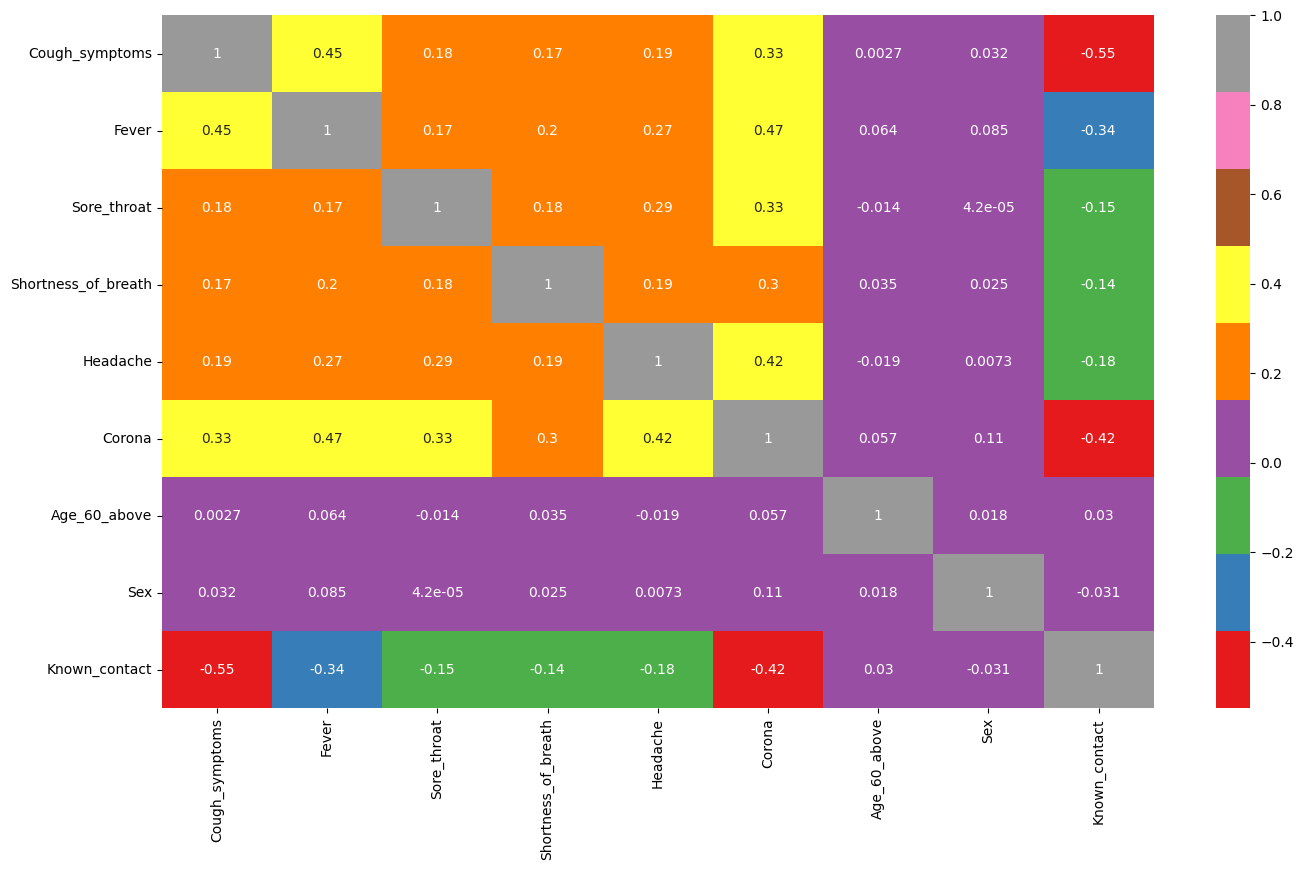

In [ ]:
plt.figure(figsize=(16,9))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='Set1')
plt.show()


In [ ]:
data.columns

Index(['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath',
       'Headache', 'Corona', 'Age_60_above', 'Sex', 'Known_contact'],
      dtype='object')

In [ ]:
# training and normalization of data
X = data[['Cough_symptoms', 'Fever','Sore_throat', 'Shortness_of_breath', 'Headache','Age_60_above', 'Sex', 'Known_contact']]
Y = data['Corona']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state=1)

# SScaler = StandardScaler()
# X_train = SScaler.fit_transform(X_train)
# X_test = SScaler.fit_transform(X_test)

In [ ]:
# def roc_curve(Y_test, Y_score):
#     from sklearn.metrics import roc_curve, auc
#     fpr, tpr, thresholds = roc_curve(Y_test, Y_score)
#     score = metrics.auc(fpr, tpr)

#     fig = px.area(
#         #fpr = False Positive Rate; tpr= True Positive Rate
#         x=fpr, y=tpr,
#         title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
#         labels=dict(x='False Positive Rate', y='True Positive Rate'),
#         width=700, height=500
#     )

#     fig.add_shape(
#         type='line', line=dict(dash='dash'),
#         x0=0, x1=1, y0=0, y1=1
#     )

#     fig.update_yaxes(scaleanchor="x", scaleratio=1)
#     fig.update_xaxes(constrain='domain')
#     fig.show()

In [ ]:
from sklearn.svm import SVC
svc= SVC()
svc.fit(X_train,Y_train)



SVC()

In [ ]:
X_test

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,Known_contact
18179,1,0,0,0,0,0,1,0
19524,0,0,0,0,0,0,0,3
39842,1,0,0,1,0,0,0,3
16767,1,0,0,0,0,0,0,3
23909,0,0,0,0,0,1,1,3
...,...,...,...,...,...,...,...,...
25431,0,0,0,0,0,0,1,3
24502,0,0,0,0,0,0,0,3
23006,0,0,0,0,0,0,1,3
18157,1,0,0,0,0,0,0,0


In [ ]:
Y_pred = svc.predict(X_test)
Y_pred



array([0, 0, 1, ..., 0, 0, 1])

In [ ]:
#test aucc
svc_accuracy= round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy
svc_accuracy

91.21000000000001

In [ ]:
#train aucc
Y_train_pred = svc.predict(X_train)
train_svc_accuracy= round(accuracy_score(Y_train,Y_train_pred), 4)*100 # Accuracy
train_svc_accuracy

92.24

In [ ]:
# Y_pred = svc.predict(X_test)


In [ ]:
#to dump model
import pickle as pk
filename = 'model.pickle'
pk.dump(svc, open(filename, 'wb'))

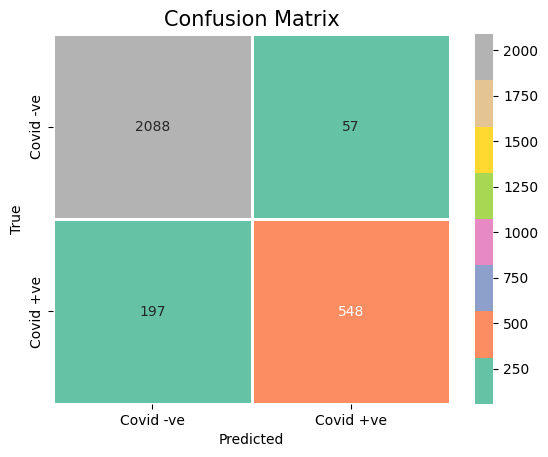

In [ ]:
# def impressions(model,accuracy):
# print('Mean squared error: ', round(mean_squared_error(Y_test,Y_pred),3))
cm=confusion_matrix(Y_test,Y_pred)
class_label = ["Covid -ve", "Covid +ve"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm,annot=True,cmap='Set2',linewidths=2,fmt='d')
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
cm=confusion_matrix(Y_test,Y_pred)
cm

array([[2088,   57],
       [ 197,  548]])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
ytest = np.array(Y_test)
print(classification_report(ytest,svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2145
           1       0.91      0.74      0.81       745

    accuracy                           0.91      2890
   macro avg       0.91      0.85      0.88      2890
weighted avg       0.91      0.91      0.91      2890



In [ ]:
from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression()
log_regression.fit(X_train,Y_train)
Y_pred = log_regression.predict(X_test)

lg_accuracy= round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy
lg_accuracy

84.6

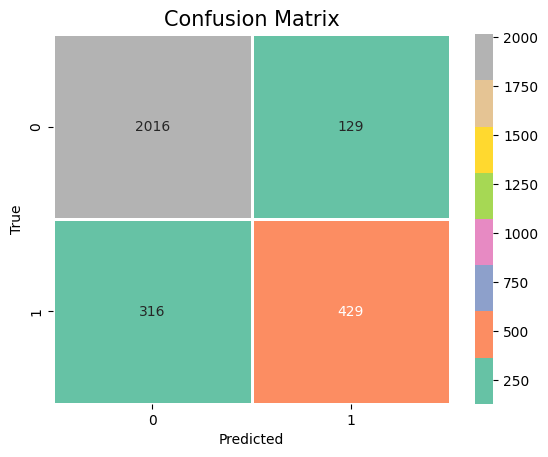

In [ ]:
# def impressions(model,accuracy):
# print('Mean squared error: ', round(mean_squared_error(Y_test,Y_pred),3))
cm=confusion_matrix(Y_test,Y_pred)
class_label = [0, 1]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm,annot=True,cmap='Set2',linewidths=2,fmt='d')
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
